### Importing Libraries and Data

In [1]:
import nltk
#nltk.download()
import pandas as pd
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
dataNlp = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=['label','body_text'], header=None)
dataNlp.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
dataNlp['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

### Preprocessing Data

In [4]:
### Q1. Preprocess the data so that stopwords are removed

stopword = nltk.corpus.stopwords.words('english')
wnl = nltk.WordNetLemmatizer()

def processData(txt):
    dataNlp['noPunct'] = txt.apply(lambda x: "".join([char.lower() for char in x if char not in string.punctuation]))
    #dataNlp['tokenized'] = dataNlp.noPunct.apply(lambda x: re.split('\W+', x))
    dataNlp['tokenized'] = dataNlp.noPunct.apply(lambda x: word_tokenize(x))
    dataNlp['noStopwords'] = dataNlp.tokenized.apply(lambda x: [word for word in x if word not in stopword])
    dataNlp['lemmatized'] = dataNlp.noStopwords.apply(lambda x: [wnl.lemmatize(word) for word in x])
    #return dataNlp.lemmatized
    
processData(dataNlp.body_text)

In [5]:
### Q2. Write down a function that can count percentage of punctuation marks in the text

dataNlp['body_len'] = dataNlp['body_text'].apply(lambda x: len(x) - x.count(" "))

def countPunct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

dataNlp['punct%'] = dataNlp.body_text.apply(lambda x: countPunct(x))
dataNlp.head()

,label,body_text,noPunct,tokenized,noStopwords,lemmatized,body_len,punct%
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",49,4.1
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",28,7.1


### Split into train/test

In [6]:
## Q3. For the test and train datasets create a TfIdfVectorizer
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    #lem = [wnl.lemmatize(word) for word in tokens if word not in stopword]
    lem = [ps.stem(word) for word in tokens if word not in stopword]
    return lem

tfVect = TfidfVectorizer(analyzer=clean_text)
xtfdata = tfVect.fit_transform(dataNlp.body_text)
dataVect = pd.DataFrame(xtfdata.toarray(), columns = tfVect.get_feature_names())

In [7]:
finalNlp=pd.concat([dataNlp[['label','body_len','punct%']], dataVect], axis=1)
finalNlp.head()

,label,body_len,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,ham,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,spam,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ham,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
### Q4. Split the whole data set into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(finalNlp.drop(['label'],axis=1), finalNlp.label, test_size=0.2, random_state=0) 

In [10]:
## Q5. Create a Ensemble classifier that can predict if the given Text is a Spam or a Ham 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

rf = RandomForestClassifier()
param = {'n_estimators': [10, 100, 200], 'max_depth': [30, 60, 90, None]}
        
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1) # n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,8.323806,1.023754,0.244392,0.027989,90,100,"{'max_depth': 90, 'n_estimators': 100}",0.970852,0.979821,0.977528,0.975281,0.971910,0.975079,0.003361,1
8,13.367296,0.346758,0.288475,0.013929,90,200,"{'max_depth': 90, 'n_estimators': 200}",0.969731,0.977578,0.979775,0.973034,0.973034,0.974630,0.003586,2
10,7.620927,0.413381,0.228134,0.016813,None,100,"{'max_depth': None, 'n_estimators': 100}",0.970852,0.975336,0.978652,0.973034,0.974157,0.974405,0.002587,3
11,26.828771,24.545555,0.294763,0.007340,None,200,"{'max_depth': None, 'n_estimators': 200}",0.968610,0.978700,0.977528,0.971910,0.975281,0.974405,0.003710,3
4,6.460447,0.214714,0.242370,0.014283,60,100,"{'max_depth': 60, 'n_estimators': 100}",0.967489,0.971973,0.976404,0.973034,0.969663,0.971711,0.003029,5



### Vectorize text

### Final evaluation of models

In [11]:
y_pred = gs.predict(X_test)

In [12]:
## Q6. Evaluate the performance of your model using confusion matrix
print(classification_report(y_test,y_pred),"\nAccuracy",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       1.00      0.85      0.92       159

    accuracy                           0.98      1114
   macro avg       0.99      0.92      0.95      1114
weighted avg       0.98      0.98      0.98      1114
 
Accuracy 0.9784560143626571


Text(33.0, 0.5, 'True Label')

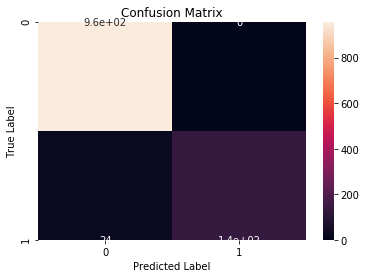

In [13]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, x)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [14]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Confusion Matrix
 [[955   0]
 [ 24 135]]


#### The Random Forest Classifier model gives an accuracy of 0.98 which is really good. High value f1 score is also obtained from the model. Zero ham was predicted as spam and 24 spams were predicted incorrectly as hams. That means only 24 out of 1114 data was wrongly predicted and that too as ham which is justifiable compared to ham predicted as spam.